In [2]:
import pandas as pd
import os
os.chdir("/home/piai/문서/빅데이터프로젝트")
os.getcwd()

'/home/piai/문서/빅데이터프로젝트'

In [3]:
df = pd.read_csv("./df.csv", encoding = 'euc-kr')
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

In [14]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# 이름을 Transaction 형태로 변환
transactions = []

for idx, row in df.iterrows():
    names = set()
    for col in ['SH', 'PD', 'TD']:
        for name in str(row[col]).split(','):
            names.add(str(name))  # 정수형을 문자열로 변환

    names.add(str(row['목표달성여부']))  # 정수형을 문자열로 변환
    transactions.append(list(names))  # 리스트로 변환하여 추가

# TransactionEncoder를 이용하여 원-핫 인코딩 수행
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
one_hot_df = pd.DataFrame(te_ary, columns=te.columns_)

# apriori를 이용하여 빈발 항목 집합을 계산
frequent_itemsets = apriori(one_hot_df, min_support=0.01, use_colnames=True)

# 연관 규칙 분석 수행
association_rules_df = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
association_rules_df.sort_values(by='confidence', ascending=False, inplace=True)


filtered_df = association_rules_df[association_rules_df['consequents'].astype(str) == '1']

print(filtered_df)




#print(association_rules_df.head(50))


Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


In [7]:
df.columns

Index(['의뢰ID', '상품목표주문금액', '상품순주문금액', '상품목표공헌이익금액', '상품예상취급금액', '매출액', '순매출액',
       '소요분', '가중분', '방송구분', '프로그램명', 'ARS금액', '방송시작시간', '방송종료시간', 'PD', 'SH',
       'TD', 'MD담당자명', '부서코드', '부서명', '협력사ID', '협력사명', '브랜드ID', '브랜드명', '대분류',
       '중분류', '카테고리', '요일', '요일그룹', '분기', '주', '월', '시간', '시간대', '연도', '계절',
       '목표달성율', '목표달성여부'],
      dtype='object')

In [8]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# 이름을 Transaction 형태로 변환
transactions = []

for idx, row in df.iterrows():
    names = set()
    for col in ['SH', 'PD', 'TD']:
        for name in str(row[col]).split(','):
            names.add(name)

    names.add(row['목표달성여부'])
    transactions.append(names)

# TransactionEncoder를 이용하여 원-핫 인코딩 수행
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
one_hot_df = pd.DataFrame(te_ary, columns=te.columns_)

# apriori를 이용하여 빈발 항목 집합을 계산
frequent_itemsets = apriori(one_hot_df, min_support=0.01, use_colnames=True)

# 연관 규칙 분석 수행
association_rules_df = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
association_rules_df.sort_values(by='confidence', ascending=False, inplace=True)

print(association_rules_df)


TypeError: '<' not supported between instances of 'str' and 'float'

In [20]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


df = df[df['목표달성여부'] == 1]

# 이름을 Transaction 형태로 변환
transactions = []

for idx, row in df.iterrows():
    names = set()
    for col in ['SH', 'PD', 'TD']:
        for name in str(row[col]).split(','):
            names.add(str(name))  # 정수형을 문자열로 변환

    transactions.append(list(names))  # 리스트로 변환하여 추가

# TransactionEncoder를 이용하여 원-핫 인코딩 수행
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
one_hot_df = pd.DataFrame(te_ary, columns=te.columns_)

# apriori를 이용하여 빈발 항목 집합을 계산
frequent_itemsets = apriori(one_hot_df, min_support=0.01, use_colnames=True)

# 연관 규칙 분석 수행
association_rules_df = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
association_rules_df.sort_values(by='confidence', ascending=False, inplace=True)


association_rules_df.sort_values(by='confidence', ascending=False, inplace=True)
print(association_rules_df.head(50))


   antecedents consequents  antecedent support  consequent support   support  \
12       (안수연)       (박상언)            0.044319            0.087677  0.015974   
19       (박서희)       (하재원)            0.036392            0.036632  0.012971   
20       (하재원)       (박서희)            0.036632            0.036392  0.012971   
10       (박승희)       (박상언)            0.068821            0.087677  0.022580   
22       (안수연)       (박승희)            0.044319            0.068821  0.012131   
28       (이효경)       (이주혁)            0.036993            0.054048  0.010089   
9        (박상언)       (박승희)            0.087677            0.068821  0.022580   
8        (박보경)       (박상언)            0.049123            0.087677  0.011530   
14       (이조헌)       (박상언)            0.060894            0.087677  0.014172   
2        (강규주)       (임주원)            0.060413            0.067259  0.012131   
16       (이주혁)       (박상언)            0.054048            0.087677  0.010449   
27       (이주혁)       (이효경)            0.

In [3]:
import pandas as pd


# 시간대 구분 함수 정의
def get_time_category(hour):
    hour = int(hour)
    if 0 <= hour < 3:
        return '심야'
    elif 3 <= hour < 6:
        return '새벽'
    elif 6 <= hour < 9:
        return '아침'
    elif 9 <= hour < 12:
        return '오전'
    elif 12 <= hour < 15:
        return '점심'
    elif 15 <= hour < 18:
        return '오후'
    elif 18 <= hour < 21:
        return '저녁'
    elif 21 <= hour < 24:
        return '야간'

# '시간대' 열 생성
df['시간대'] = df['시작시간'].apply(get_time_category)



In [4]:
# 목표 달성 했는지 안했는지 여부 확인하는 열 추가
df['성공여부']=df['상품목표취급금액'] - df['매출액']
df['성공여부'] = ['실패' if x > 0 else '성공' for x in df['성공여부']]

In [5]:
def success(x):
    if x =='성공':
        return 1
    else:
        return 0

In [6]:
df['성공여부'] = df['성공여부'].apply(success)

In [7]:
import pandas as pd
import numpy as np


# 매핑 함수
def map_md_names(value):
    if isinstance(value, str):
        names = value.split(',')
        if len(names) > 1:
            return names[0], names[1]
        else:
            return names[0], np.nan
    else:
        return np.nan, np.nan

# 새로운 열 'MD1'과 'MD2' 생성
df['MD1'], df['MD2'] = zip(*df['MD담당자명'].map(map_md_names))
df['SH1'], df['SH2'] = zip(*df['SH'].map(map_md_names))


In [8]:
# 조합 열을 새로 만들기
df['조합'] = df.apply(lambda row: f"{row['SH1']},{row['MD1']}" if row['SH1'] and row['MD1'] else None, axis=1)

print(df['조합'])

0        nan,최승미
1        nan,심인혜
2        nan,심인혜
3        nan,최병규
4        nan,신대혁
          ...   
25651     최석,가길호
25652     최석,가길호
25653     최석,가길호
25654    박원이,심인혜
25655    최규좌,최희수
Name: 조합, Length: 25656, dtype: object


__________________________

In [9]:
new_df = pd.DataFrame(df[df['성공여부'] == 1]['조합'].copy())

In [10]:
df_filtered = new_df[~new_df['조합'].str.contains('nan')]

In [11]:
df_filtered.columns = ['조합']

TypeError: '<' not supported between instances of 'str' and 'float'

In [12]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


# '조합' 열의 값을 , 로 구분하여 'MD1'과 'SH2'로 나누기
df_filtered[['MD1', 'SH1']] = df_filtered['조합'].str.split(',', expand=True)

df_ass = df_filtered[['MD1', 'SH1']]



new_data = {
    'Type': ['MD1'] * len(df_ass) + ['SH1'] * len(df_ass),
    'NAME': df_ass['MD1'].tolist() + df_ass['SH1'].tolist()
}

new = pd.DataFrame(new_data)




/home/piai/anaconda3/lib/python3.10/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [13]:
new.head()

,Type,NAME
0,MD1,최육영
1,MD1,박장혜
2,MD1,박장혜
3,MD1,최소유
4,MD1,박주혁B


In [14]:
ID = list(set(new['Type']))
list_association = []
for i in ID:
    tmp_list = list(new[new['Type']==i]['NAME'])
    tmp_list.sort()
    list_association.append(tmp_list)


In [15]:
enc = TransactionEncoder()
df_new_enc = enc.fit_transform(X=list_association)
df_asso = pd.DataFrame(df_new_enc, columns = enc.columns_)
df_asso.head()

,가길호,강규주,강병주,강승필,고이혁,곽주애,권동인,남기중,노상필,박경은,...,최주나,최주선,최채원,최한빛,최형권,최환수,최희수,하재원,한은영,황새롬
0,True,False,True,True,True,False,True,True,True,True,...,True,True,False,False,True,True,True,False,True,True
1,False,True,False,False,False,True,False,False,False,False,...,False,False,True,True,False,False,False,True,False,False


In [16]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
v_min_support = 0.4
df_freq = apriori(df_asso, min_support = v_min_support, use_colnames = True)

In [ ]:
df_asso_rule = association_rules(df_freq, metric='confidence', min_threshold = 0.7)

In [ ]:
# TransactionEncoder를 사용하여 데이터프레임을 트랜잭션 형태로 변환
te = 
transactions = new_df.values.tolist()
te_ary = te.fit_transform(transactions)
df_filtered_transformed = pd.DataFrame(te_ary, columns=te.columns_)

# Apriori 알고리즘을 사용하여 연관 규칙 생성
frequent_itemsets = apriori(df_filtered_transformed, min_support=0.1, use_colnames=True)
association_rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

print(association_rules)


In [88]:
import pandas as pd



# 개별 조합의 성공 및 실패 횟수 계산
success_counts = df.groupby(['조합', '성공여부']).size().unstack(fill_value=0)
success_counts.reset_index(inplace=True)

# 새로운 데이터프레임 'comb' 생성 및 열 추가
comb = pd.DataFrame()
comb['people'] = success_counts['조합']
comb['success'] = success_counts[1]
comb['total'] = success_counts[1] + success_counts[0]
comb['ratio'] = comb['success'] / comb['total']
comb['대분류'] = df['대분류']
print(comb)


      people  success  total     ratio 대분류
0    nan,가길호       16     16  1.000000  의류
1    nan,강병주        5      8  0.625000  식품
2    nan,고이혁        7      8  0.875000  식품
3    nan,권동인       20     31  0.645161  식품
4    nan,남기중       19     25  0.760000  식품
..       ...      ...    ...       ...  ..
913  하재원,최장화        1      1  1.000000  가구
914  하재원,최조학        4      5  0.800000  가구
915  하재원,최주나        3      5  0.600000  가구
916  하재원,최희수        3      3  1.000000  가구
917  하재원,한은영        1      2  0.500000  가구

[918 rows x 5 columns]


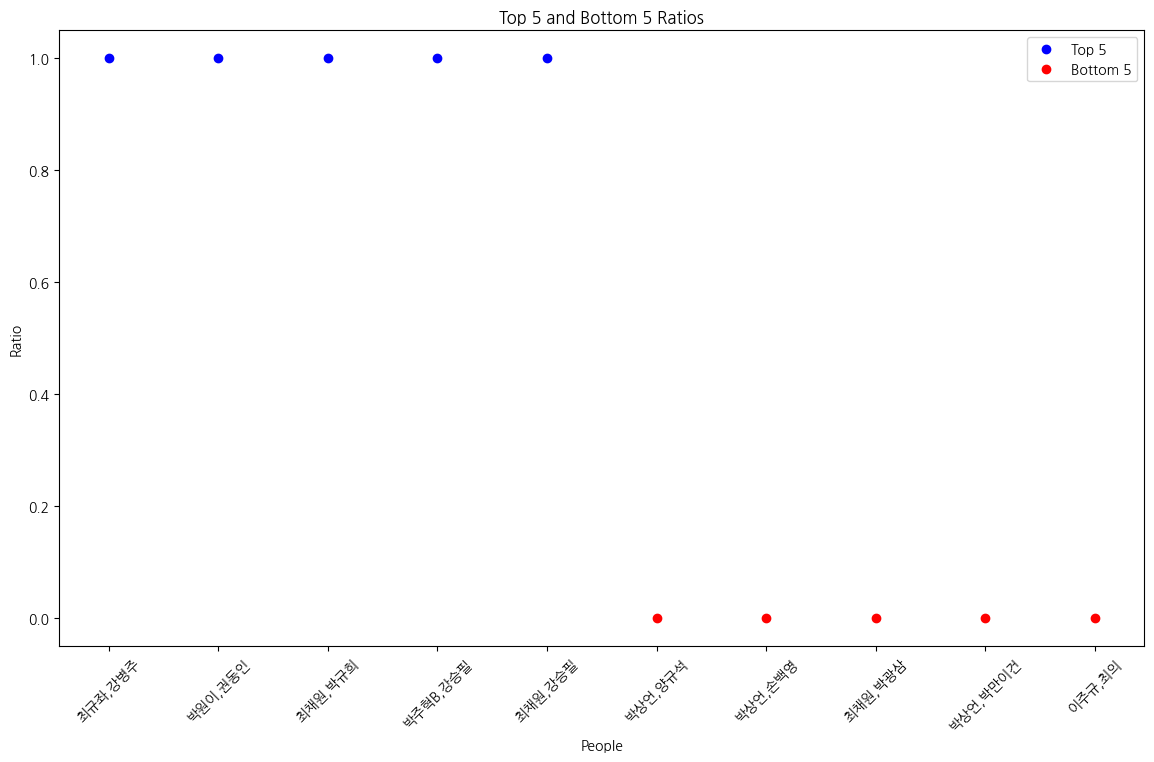

In [89]:
import pandas as pd
import matplotlib.pyplot as plt


# 대분류가 '의류'인 경우의 people별 ratio 상위 및 하위 5개 추출
clothing_comb = comb[comb['대분류'] == '식품'].sort_values(by='ratio', ascending=False)

top_5 = clothing_comb.head(5)
bottom_5 = clothing_comb.tail(5)

# 그래프 그리기
plt.figure(figsize=(14, 8))

plt.scatter(top_5['people'], top_5['ratio'], color='blue', label='Top 5')
plt.scatter(bottom_5['people'], bottom_5['ratio'], color='red', label='Bottom 5')

plt.xlabel("People")
plt.ylabel("Ratio")
plt.title("Top 5 and Bottom 5 Ratios")

plt.xticks(rotation=45)
plt.legend()

# 각 점 옆에 조합 값 표시
?
plt.show()


In [ ]:
new_df = pd.DataFrame(df[df['목표달성여부'] == 1]['조합'].copy())

In [ ]:
df_filtered = new_df[~new_df['조합'].str.contains('nan')]

In [99]:
comb_filtered = comb[~comb['people'].str.contains('nan')]

In [ ]:
ID = list(set(new['Type']))
list_association = []
for i in ID:
    tmp_list = list(new[new['Type']==i]['NAME'])
    tmp_list.sort()
    list_association.append(tmp_list)


In [ ]:
import pandas as pd

# 개별 조합의 성공 및 실패 횟수 계산
success_counts = df.groupby(['조합', '성공여부']).size().unstack(fill_value=0)
success_counts.reset_index(inplace=True)

# 새로운 데이터프레임 'comb' 생성 및 열 추가
comb = pd.DataFrame()
comb['people'] = success_counts['조합']
comb['success'] = success_counts[1]
comb['total'] = success_counts[1] + success_counts[0]
comb['ratio'] = comb['success'] / comb['total']
comb['대분류'] = df['대분류']
print(comb)


In [ ]:
enc = TransactionEncoder()
df_new_enc = enc.fit_transform(X=list_association)
df_asso = pd.DataFrame(df_new_enc, columns = enc.columns_)
df_asso.head()

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
# TransactionEncoder를 사용하여 데이터프레임을 트랜잭션 형태로 변환
te = 
transactions = new_df.values.tolist()
te_ary = te.fit_transform(transactions)
df_filtered_transformed = pd.DataFrame(te_ary, columns=te.columns_)

# Apriori 알고리즘을 사용하여 연관 규칙 생성
frequent_itemsets = apriori(df_filtered_transformed, min_support=0.1, use_colnames=True)
association_rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

print(association_rules)


In [101]:
print(comb_filtered)

      people  success  total     ratio   대분류
37   강규주,가길호      127    168  0.755952  이미용품
38   강규주,권동인        1      1  1.000000  이미용품
39   강규주,서장복        0      1  0.000000  이미용품
40   강규주,손백영        0      7  0.000000    식품
41   강규주,원상연        0      1  0.000000    의류
..       ...      ...    ...       ...   ...
913  하재원,최장화        1      1  1.000000    가구
914  하재원,최조학        4      5  0.800000    가구
915  하재원,최주나        3      5  0.600000    가구
916  하재원,최희수        3      3  1.000000    가구
917  하재원,한은영        1      2  0.500000    가구

[881 rows x 5 columns]


In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


# '조합' 열의 값을 , 로 구분하여 'MD1'과 'SH2'로 나누기
df_filtered[['MD1', 'SH1']] = df_filtered['조합'].str.split(',', expand=True)

df_ass = df_filtered[['MD1', 'SH1']]



new_data = {
    'Type': ['MD1'] * len(df_ass) + ['SH1'] * len(df_ass),
    'NAME': df_ass['MD1'].tolist() + df_ass['SH1'].tolist()
}

new = pd.DataFrame(new_data)




In [ ]:
import pandas as pd



# 개별 조합의 성공 및 실패 횟수 계산
success_counts = df.groupby(['조합', '성공여부']).size().unstack(fill_value=0)
success_counts.reset_index(inplace=True)

# 새로운 데이터프레임 'comb' 생성 및 열 추가
comb = pd.DataFrame()
comb['people'] = success_counts['조합']
comb['success'] = success_counts[1]
comb['total'] = success_counts[1] + success_counts[0]
comb['ratio'] = comb['success'] / comb['total']
comb['대분류'] = df['대분류']
print(comb)


In [72]:
ddf['MD1'].head(20)

0      최승미
1      심인혜
2      심인혜
3      최병규
4      신대혁
5      심인혜
6      심인혜
7     박만이건
8     박만이건
9      최유만
10     최주나
11     최주나
12     최주나
13     이서소
14     이서소
15     이서소
16     이서소
17     최유만
18     최승미
19     최병규
Name: MD1, dtype: object

In [73]:
df_new = df_new[['MD1', 'SH1']]
df_new.head(10)

,MD1,SH1
10,최주나,최육영
11,최주나,최육영
12,최주나,최육영
13,이서소,박장혜
14,이서소,박장혜
15,이서소,박장혜
16,이서소,박장혜
17,최유만,최소유
18,최승미,박주혁B
19,최병규,최한빛


In [76]:
df_new = df_new.fillna('n')
df_new.head(20)

,MD1,SH1
10,최주나,최육영
11,최주나,최육영
12,최주나,최육영
13,이서소,박장혜
14,이서소,박장혜
15,이서소,박장혜
16,이서소,박장혜
17,최유만,최소유
18,최승미,박주혁B
19,최병규,최한빛


One-hot encoded data
         가길호    강규주    강동완    강병주    강승필    고이혁    곽주애    권기문    권동인    남기중  \
0      False  False  False  False  False  False  False  False  False  False   
1      False  False  False  False  False  False  False  False  False  False   
2      False  False  False  False  False  False  False  False  False  False   
3      False  False  False  False  False  False  False  False  False  False   
4      False  False  False  False  False  False  False  False  False  False   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
25088   True  False  False  False  False  False  False  False  False  False   
25089   True  False  False  False  False  False  False  False  False  False   
25090   True  False  False  False  False  False  False  False  False  False   
25091  False  False  False  False  False  False  False  False  False  False   
25092  False  False  False  False  False  False  False  False  False  False   

       ...    최주나    최주선    최채

ValueError: The input DataFrame `df` containing the frequent itemsets is empty.